In [66]:
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [68]:
#assigning csv to df so I can use by usinf pd.read_csv()
df = pd.read_csv("medical_examination.csv")
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [69]:
#changing units of height to metres then performing BMI calculation
df['height']=df['height']/100
df['BMI']= (df['weight']/(df['height']*df['height']))

In [70]:
df['BMI']= round((df['weight']/(df['height']*df['height'])),2)
#method 1 
#adding overweight column using condition
df['overweight'] = df['BMI'].apply(lambda x: '1' if x > 25 else '0')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,1,1,1,0,1,0,26.93,1
69996,99995,22601,1,1.58,126.0,140,90,2,2,0,0,1,1,50.47,1
69997,99996,19066,2,1.83,105.0,180,90,3,1,0,1,0,1,31.35,1
69998,99998,22431,1,1.63,72.0,135,80,1,2,0,0,0,1,27.10,1


In [71]:
#changing cholesterol values to 1 if greater 1 or zero of >= 1
df['cholesterol'] = df['cholesterol'].apply(lambda x: '1' if x > 1 else '0')


In [72]:
#changing str to int
df['cholesterol']=pd.to_numeric(df['cholesterol'])

In [73]:
#checking datatypes have changed
df['cholesterol'].dtypes

dtype('int64')

In [74]:
#changing cholesterol values to 1 if greater 1 or zero of >= 1
df['gluc'] = df['gluc'].apply(lambda x: '1' if x > 1 else '0')

In [75]:
#checking datatypes have changed
df['gluc']=pd.to_numeric(df['gluc'])

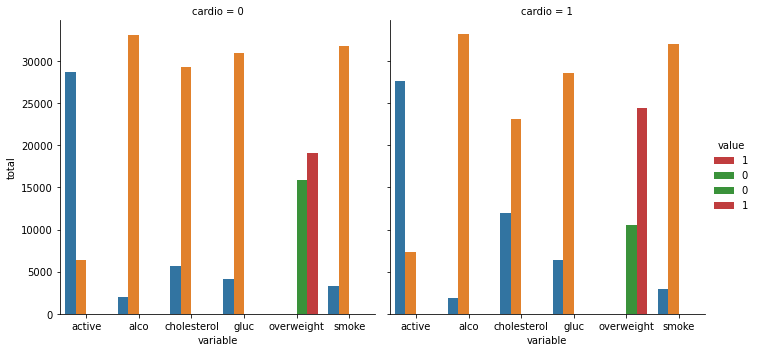

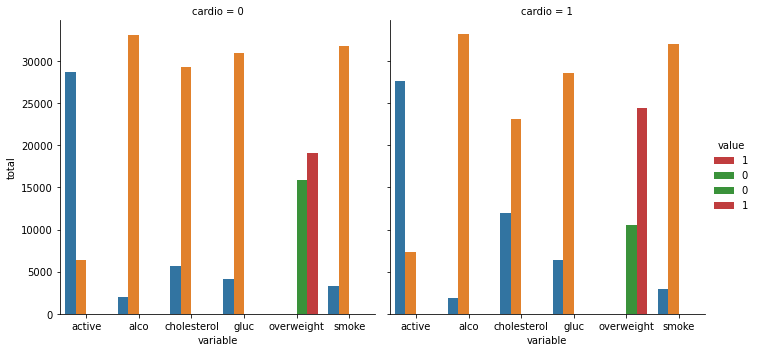

In [105]:
# Draw Categorical Plot
#def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
df_cat = pd.melt(df, var_name = 'variable', value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'], id_vars = 'cardio')

    # Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")
fig = fig.fig


    # Do not modify the next two lines
fig.savefig('catplot.png')
fig


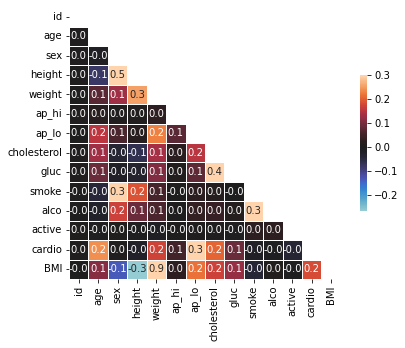

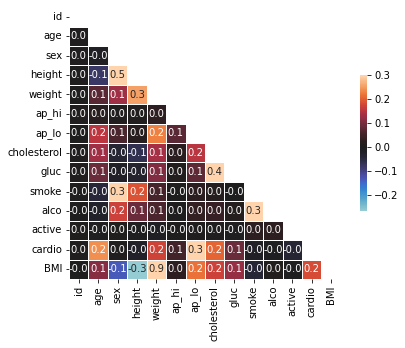

In [108]:
# Draw Heat Map
# Clean the data
df_heat = df[(df['ap_lo']<=df['ap_hi']) &
(df['height'] >= df['height'].quantile(0.025))&
(df['height'] <= df['height'].quantile(0.975))&
(df['weight'] >= df['weight'].quantile(0.025))&
(df['weight'] <= df['weight'].quantile(0.975))
 ]

    # Calculate the correlation matrix
corr = df_heat.corr()
    

    # Generate a mask for the upper triangle
   
mask = np.triu(corr)
    

    # Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(7, 5))
    

    # Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)
  

    # Do not modify the next two lines
fig.savefig('heatmap.png')
fig